## Importing all the necessary packages ##

In [387]:
# This is classification and regression problem where we have to predict the quality of wine(red & white) based on a set of values for features

import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import warnings
warnings.filterwarnings('ignore')

## Reading the white-wine data ##

In [388]:
# Reading the white-wine csv file

df_white_wine= pd.read_csv("/Users/revasmac/Desktop/Data245_ML/winequality-white.csv")
df_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Data Preprocessing for white-wine ##

In [389]:
# Checking for NULL values

print(df_white_wine.isnull().values.any())

False


In [390]:
# summary
df_white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [391]:
# Checking for categorical values

print(df_white_wine.shape)

df_white_wine.info()

(4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [392]:
# Checking for duplicate rows

df_white_wine=df_white_wine.drop_duplicates()
df_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [393]:
# Creating a copy of the white-wine dataset so that the original dataset will not change.

df_white_wine_cf = df_white_wine.copy()
df_white_wine_cf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [394]:
# Adding "_" in between all the columns of white-wine dataset

df_white_wine_cf.columns = df_white_wine.columns.str.replace(" ", "_")
df_white_wine_cf

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Converting into binary classification ##

In [395]:
# For binary classification of the target variable we are adding one new column named "quality_rank" and making it "0" for quality between (1-6) and "1" for quality (7&8)

df_white_wine_cf['quality_rank'] = [1 if x >= 6 else 0 for x in df_white_wine_cf['quality']]
df_white_wine_cf

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_rank
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [396]:
# Separating the feature variables and target variable

X_white = df_white_wine_cf.drop(['quality','quality_rank'], axis = 1)
y_white = df_white_wine_cf['quality_rank']

In [397]:
# See proportion of wines based on quality_rank for making sure that data is not imbalanced.

df_white_wine_cf['quality_rank'].value_counts()

1    2613
0    1348
Name: quality_rank, dtype: int64

#### Based on above result we can see that it's fair enough to fit the data into model!!!####

## Preparing data for modeling ##

#### Standardizing feature variables in order to equalize the range of the data.####

In [398]:
# Normalize feature variables

from sklearn.preprocessing import StandardScaler

X_features_white = X_white 
X_white = StandardScaler().fit_transform(X_white)

## Split data ##

In [399]:
# Splitting the data into 70% training and 30% test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=0)

## Classification model for white-wine ##

In [400]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
white_clf = svm.SVC(kernel='rbf', C= 1, gamma= 'scale') # rbf Kernel

#Train the model using the training sets
white_clf.fit(X_train, y_train)

#Predict the response for test dataset
white_y_pred = white_clf.predict(X_test)

In [401]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, white_y_pred))

Accuracy: 0.7611438183347351


In [402]:
# determine precision score 
print("precision_score:",metrics.precision_score(y_test, white_y_pred))

precision_score: 0.8041112454655381


In [403]:
# determine recall score 
print("recall_score:",metrics.recall_score(y_test, white_y_pred))

recall_score: 0.8449809402795425


In [404]:
# determine the roc_auc_score
print("roc_auc_score:",metrics.roc_auc_score(y_test, white_y_pred))

roc_auc_score: 0.7209979328263384


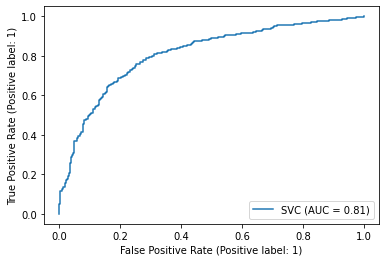

In [405]:
# plot the roc_auc_curve
import matplotlib.pyplot as plt 
metrics.plot_roc_curve(white_clf, X_test, y_test)  
plt.show() 

In [406]:
# determine precision_recall_curve
print("precision_recall_curve:",metrics.precision_recall_curve(y_test, white_y_pred))

precision_recall_curve: (array([0.66190076, 0.80411125, 1.        ]), array([1.        , 0.84498094, 0.        ]), array([0, 1]))


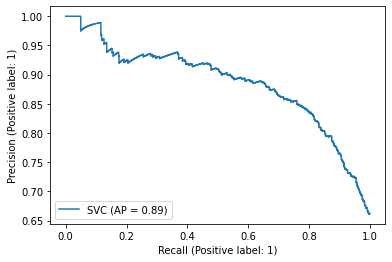

In [407]:
import matplotlib.pyplot as plt 
metrics.plot_precision_recall_curve(white_clf, X_test, y_test)  
plt.show()

In [408]:
# determine f1_score
print("f1_score:",metrics.f1_score(y_test, white_y_pred))

f1_score: 0.8240396530359355


In [409]:
# the confusion matrix.
print("confusion_matrix:",metrics.confusion_matrix(y_test, white_y_pred))

confusion_matrix: [[240 162]
 [122 665]]


In [410]:
# determine the classifcation report.
print("classification_report:\n",metrics.classification_report(y_test, white_y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.66      0.60      0.63       402
           1       0.80      0.84      0.82       787

    accuracy                           0.76      1189
   macro avg       0.73      0.72      0.73      1189
weighted avg       0.76      0.76      0.76      1189



## Regression model for white-wine ##

In [411]:
#Import svm model
from sklearn import svm

#Create a svm Regression
white_reg = svm.SVR(kernel='rbf', C= 0.1, gamma = .01) # rbf Kernel

#Train the model using the training sets
white_reg.fit(X_train, y_train)

#Predict the response for test dataset
white_y_pred = white_reg.predict(X_test)
white_y_pred

array([ 0.77206751, -0.06033138,  0.96176575, ...,  0.97905657,
        0.5776651 ,  0.68908047])

In [412]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Check the r2-score value.
print(" The r-square_value",metrics.r2_score(y_test, white_y_pred))


 The r-square_value 0.19378699934993127


In [413]:
# determine MAE score
print(" The MAE_score:",metrics.mean_absolute_error(y_test, white_y_pred))

 The MAE_score: 0.3285504559427606


In [414]:
# determine MSE score
print(" The MSE_score:",metrics.mean_squared_error(y_test, white_y_pred, squared=True))

 The MSE_score: 0.1804209118119239


In [415]:
# determine rmse score
print(" The rmse_score:",metrics.mean_squared_error(y_test, white_y_pred, squared=False))

 The rmse_score: 0.42475982838767123


## Reading the red-wine data ##

In [416]:
# Reading the red-wine csv file

df_red_wine= pd.read_csv("/Users/revasmac/Desktop/Data245_ML/winequality-red.csv")
df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Preprocessing for red-wine ##

In [417]:
# Checking for NULL values

print(df_red_wine.isnull().values.any())

False


In [418]:
# summary
df_red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [419]:
# Checking for categorical values

print(df_red_wine.shape)

df_red_wine.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [420]:
# Checking for duplicate rows

df_red_wine=df_red_wine.drop_duplicates()
df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [421]:
# Creating a copy of the red wine dataset so that the original dataset will not change.

df_red_wine_cf = df_red_wine.copy()
df_red_wine_cf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [422]:
# Adding "_" in between all the columns of red wine dataset

df_red_wine_cf.columns = df_red_wine.columns.str.replace(" ", "_")
df_red_wine_cf

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [423]:
# For binary classification of the target variable we are adding one new column named "quality_rank" and making it "0" for quality between (1-6) and "1" for quality (7&8)

df_red_wine_cf['quality_rank'] = [1 if x >= 6 else 0 for x in df_red_wine_cf['quality']]
df_red_wine_cf

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_rank
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [424]:
# Separating the feature variables and target variable

X_red = df_red_wine_cf.drop(['quality','quality_rank'], axis = 1)
y_red = df_red_wine_cf['quality_rank']

In [425]:
# See proportion of wines based on quality_rank for making sure that data is not imbalanced.

df_red_wine_cf['quality_rank'].value_counts()

1    719
0    640
Name: quality_rank, dtype: int64

#### Based on above result we can see that it's fair enough to fit the data into model!!!####

## Preparing data for modeling ##

#### Standardizing feature variables in order to equalize the range of the data.####

In [426]:
# Normalize feature variables

from sklearn.preprocessing import StandardScaler

X_features_red = X_red 
X_red = StandardScaler().fit_transform(X_red)

## Split data ##

In [427]:
# Splitting the data into training and test dataset.

from sklearn.model_selection import train_test_split
X_true, X_test, y_true, y_test = train_test_split(X_red, y_red, test_size=.30, random_state=0)

## Classification Model for red-wine ##

In [428]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
red_clf = svm.SVC(kernel='rbf', C = 1, gamma = 0.1) # rbf Kernel

#Train the model using the training sets
red_clf.fit(X_true, y_true)

#Predict the response for test dataset
red_y_pred = red_clf.predict(X_test)


In [429]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, red_y_pred))

Accuracy: 0.75


In [430]:
# determine precision score
print("precision_score:",metrics.precision_score(y_test, red_y_pred))

precision_score: 0.7878787878787878


In [431]:
# determine recall score
print("recall_score:",metrics.recall_score(y_test, red_y_pred))

recall_score: 0.7222222222222222


In [432]:
#check the areaUnderROC value
print("roc_auc_score:",metrics.roc_auc_score(y_test, red_y_pred))

roc_auc_score: 0.7517361111111112


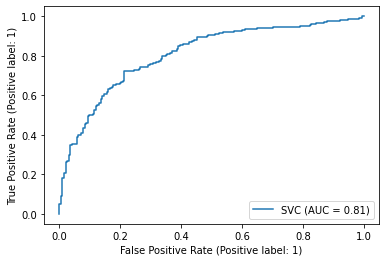

In [433]:
# plot the ROC curve
import matplotlib.pyplot as plt 
metrics.plot_roc_curve(red_clf, X_test, y_test)  
plt.show()

In [434]:
# determine precision_recall_curve
print("precision_recall_curve:",metrics.precision_recall_curve(y_test, red_y_pred))

precision_recall_curve: (array([0.52941176, 0.78787879, 1.        ]), array([1.        , 0.72222222, 0.        ]), array([0, 1]))


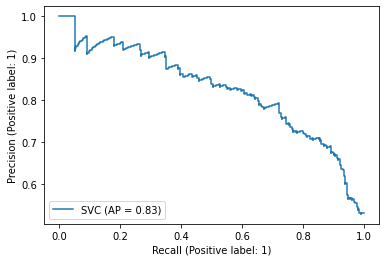

In [435]:
import matplotlib.pyplot as plt 
metrics.plot_precision_recall_curve(red_clf, X_test, y_test)  
plt.show()

In [436]:
# determine f1 score
print("f1_score:",metrics.f1_score(y_test, red_y_pred))

f1_score: 0.7536231884057971


In [437]:
# determine confusion matrix
print("confusion_matrix:",metrics.confusion_matrix(y_test, red_y_pred))

confusion_matrix: [[150  42]
 [ 60 156]]


In [438]:
# determine classcification report
print("classification_report:\n",metrics.classification_report(y_test, red_y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75       192
           1       0.79      0.72      0.75       216

    accuracy                           0.75       408
   macro avg       0.75      0.75      0.75       408
weighted avg       0.75      0.75      0.75       408



## Regression model for red-wine ##

In [439]:
#Import svm model
from sklearn import svm

#Create a svm Regression
red_reg = svm.SVR(kernel='rbf', C=1, gamma = 0.1) # rbf Kernel

#Train the model using the training sets
red_reg.fit(X_true, y_true)

#Predict the response for test dataset
red_y_pred = red_reg.predict(X_test)
red_y_pred

array([ 1.09994239e+00,  1.86316286e-01,  3.87684551e-01,  5.33373391e-01,
        9.12106535e-01,  4.81050651e-01,  9.64643571e-01,  8.27697163e-01,
       -5.28265090e-02,  9.91714051e-01,  1.42137053e-01,  7.08494092e-01,
        2.57347601e-01,  1.63493539e-01,  1.02853350e+00,  9.26618753e-01,
        1.01252364e+00,  5.51441509e-01,  8.29450564e-01,  6.23001158e-01,
        6.52955310e-01, -1.05196855e-01,  8.29716059e-01,  1.12151205e+00,
        7.40733037e-01,  5.85217663e-01,  1.02851158e+00,  7.78879464e-01,
       -1.60295981e-02, -7.25241545e-02,  2.92952862e-01, -1.34051139e-01,
        1.52073132e-01,  6.31949863e-01,  9.78250426e-01,  8.55100096e-01,
        7.28240313e-02,  7.58749808e-01,  7.05865745e-01,  4.50004544e-01,
        6.66221073e-01,  4.94684866e-01,  1.01719773e+00,  9.64835111e-01,
        6.78094902e-01,  6.71140340e-01,  1.89280360e-01,  2.02944274e-01,
        5.86417963e-01,  6.81688251e-01,  9.83500265e-01,  5.54527483e-02,
        5.80920386e-01,  

In [440]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Check the r2-score value.
print(" The r-square_value",metrics.r2_score(y_test, red_y_pred))

 The r-square_value 0.22925859634364043


In [441]:
# check for MAE score
print(" The MAE_score:",metrics.mean_absolute_error(y_test, red_y_pred))

 The MAE_score: 0.3323012666277706


In [442]:
# Check for MSE score
print(" The MSE_score:",metrics.mean_squared_error(y_test, red_y_pred, squared= True))

 The MSE_score: 0.19201861959604805


In [443]:
# Check for rmse score
print(" The rmse_score:",metrics.mean_squared_error(y_test, red_y_pred, squared= False))

 The rmse_score: 0.43819929209898095
